In [20]:
import os
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import h5py
import tables as pt
import random
import math
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_dir = 'C:/Work/MOOC/udacity_machine_learning/cats-vs-dogs/train/'

In [45]:
%cd train

C:\Work\MOOC\udacity_machine_learning\cats-vs-dogs\train


### Show some images

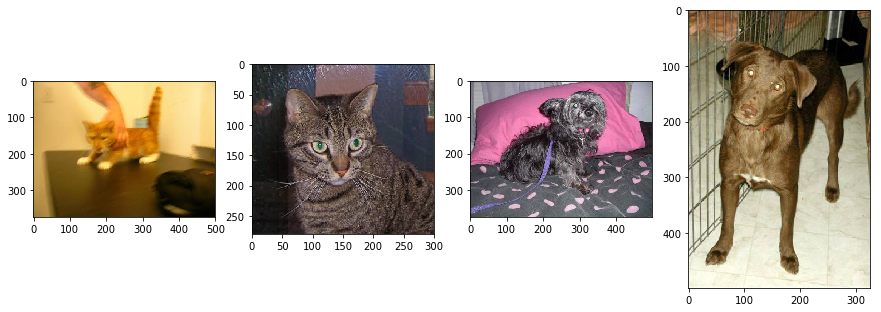

In [46]:
def show_img(files):
    plt.figure(figsize=(15, 7))
    for i in range(len(files)):
        plt.subplot(1, len(files), i+1)
        img = cv2.imread(files[i])
        img = img[:, :, ::-1]        
        plt.imshow(img, cmap='gray')
    plt.show()

show_img(['cat.0.jpg', 'cat.1.jpg', 'dog.0.jpg', 'dog.1.jpg'])

### Create dataframe to store image info

In [35]:
# Create lists to store label (cat or dog) and image file path
labels=[]
paths=[]

# Get all image files
img_files = os.listdir(train_dir)

# save labels and paths
for file in img_files:
    label = ['cat', 'dog'].index(file[:3])
    labels.append(label)
    paths.append(train_dir + file)
    
# Create dataframe
img_df = pd.DataFrame({
    'label': labels,
    'full_path': paths
})

pd.set_option('max_colwidth', 200) # display complete full path name
img_df.head()

,full_path,label
0,C:/Work/MOOC/udacity_machine_learning/cats-vs-dogs/train/cat.0.jpg,0
1,C:/Work/MOOC/udacity_machine_learning/cats-vs-dogs/train/cat.1.jpg,0
2,C:/Work/MOOC/udacity_machine_learning/cats-vs-dogs/train/cat.10.jpg,0
3,C:/Work/MOOC/udacity_machine_learning/cats-vs-dogs/train/cat.100.jpg,0
4,C:/Work/MOOC/udacity_machine_learning/cats-vs-dogs/train/cat.1000.jpg,0


### Explore data

In [13]:
# add width, height and ratio (width / height) info to dataframe
def enrich_df():
    widths = []
    heights = []
    ratios = []
    
    for index, row in img_df.iterrows():
        img_full_path = row['full_path']
        img = Image.open(img_full_path,'r')
        width, height = img.size
        widths.append(width)
        heights.append(height)
        ratios.append(float(width)/float(height))
    
    img_df['width'] = widths
    img_df['height'] = heights
    img_df['ratio'] = ratios

enrich_df()

In [14]:
img_df.head()

,full_path,label,width,height,ratio
0,C:/Work/MOOC/udacity_machine_learning/cats-vs-dogs/train/cat.0.jpg,0,500,374,1.336898
1,C:/Work/MOOC/udacity_machine_learning/cats-vs-dogs/train/cat.1.jpg,0,300,280,1.071429
2,C:/Work/MOOC/udacity_machine_learning/cats-vs-dogs/train/cat.10.jpg,0,489,499,0.979960
3,C:/Work/MOOC/udacity_machine_learning/cats-vs-dogs/train/cat.100.jpg,0,403,499,0.807615
4,C:/Work/MOOC/udacity_machine_learning/cats-vs-dogs/train/cat.1000.jpg,0,150,149,1.006711


In [16]:
# plot image size distribution
def plot_img_size_dist():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 2))
    ax1.plot(img_df['ratio'])
    ax1.set_title('Image size ratio : width/height')
    ax1.set_xlabel('Image index')
    ax1.set_ylabel('Ratio')
    print ('Average image ratio: {}'.format(np.mean(img_df['ratio'])))
    
    ax2.plot(img_df['width'], img_df['height'], '.g')
    ax2.set_title('Image size')
    ax2.set_xlabel('Width in pixels')
    ax2.set_ylabel('Height in pixels')
    plt.show()

Average image ratio: 1.1571988454164763


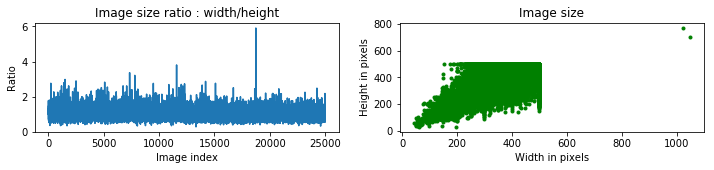

In [17]:
plot_img_size_dist()

In [18]:
# check more statistics
img_df.describe()

,label,width,height,ratio
count,25000.00000,25000.00000,25000.000000,25000.000000
mean,0.50000,404.09904,360.478080,1.157199
std,0.50001,109.03793,97.019959,0.291914
min,0.00000,42.00000,32.000000,0.306613
25%,0.00000,323.00000,301.000000,0.929851
50%,0.50000,447.00000,374.000000,1.270944
75%,1.00000,499.00000,421.000000,1.336898
max,1.00000,1050.00000,768.000000,5.909091
